## reconocimiento facial

In [1]:
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
faces=fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


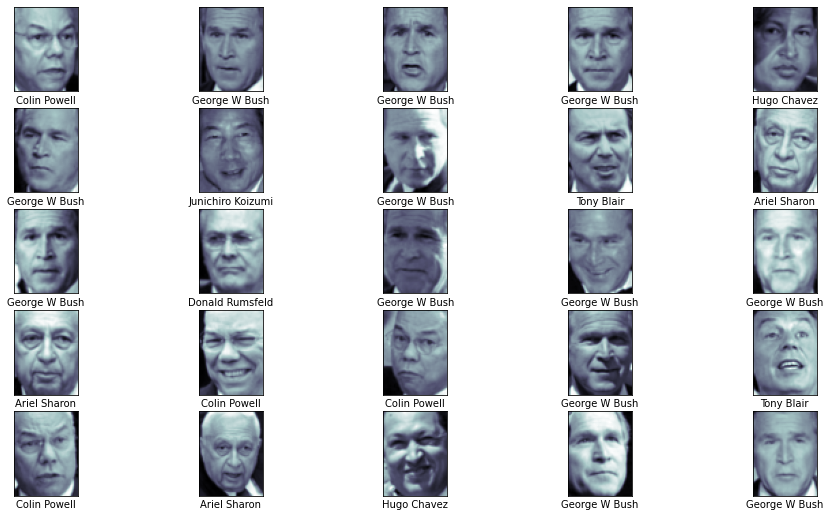

In [4]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [7]:
## sacamos las caracteristicticas más sobresalientes
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
## dividimos la muestra
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
## aplicar diferentes parametros al modelos para saber cuales son los parametros optimos
grid=GridSearchCV(model, param_grid)
## saber cuanto tiempo tarda
%time grid.fit(Xtrain, Ytrain)

Wall time: 2min 28s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [18]:
## imprimimos los valores más optimos tener en cueta que si los valores seleccionados son de las 
## ezquinas es por que posiblemente no tenía otros parametros para comprobar y eligio los de la ezquina
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [19]:
classifier= grid.best_estimator_
yfit=classifier.predict(Xtest)

In [20]:
Xtest.shape

(337, 2914)

Text(0.5, 0.98, 'Predicciones de las imágnes (incorrectas en rojo)')

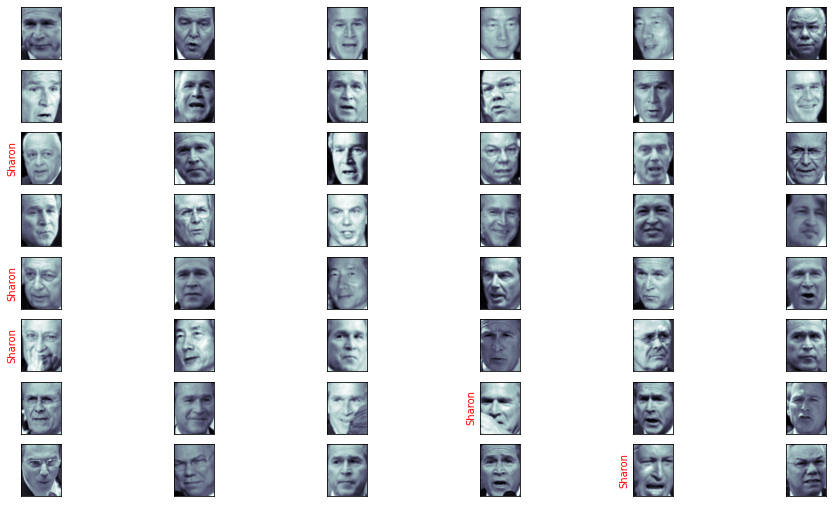

In [50]:
## inprimirmos las imagenes 
from numpy import size


pl, ax= plt.subplots(8,6, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ## mostramos la imagen, haciendo un rezise
    ax_i.imshow(Xtest[i].reshape(62, 47), cmap="bone")
    ## para que no tenga divisiones
    ax_i.set(xticks=[], yticks=[])
    ## pintar nombre y si falló la predicción poner de color rojo
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1], color="white" if yfit[i] else "red")
fig.suptitle("Predicciones de las imágnes (incorrectas en rojo)", size = 15)

## hacemos un reporte

In [51]:
from sklearn.metrics import classification_report

In [54]:
## reporte del clasificador
print(classification_report(Ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
mat=confusion_matrix(Ytest, yfit)

In [59]:
mat

array([[ 11,   1,   2,   1,   0,   0,   0,   0],
       [  2,  59,   2,   3,   0,   0,   0,   2],
       [  1,   2,  26,   1,   0,   0,   0,   1],
       [  2,  11,   3, 105,   2,   1,   0,   2],
       [  0,   0,   1,   1,  19,   0,   1,   1],
       [  1,   1,   0,   2,   1,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   1,   1,   0,   0,   0,  40]], dtype=int64)

In [60]:
import seaborn as sns; sns.set()

<AxesSubplot:>

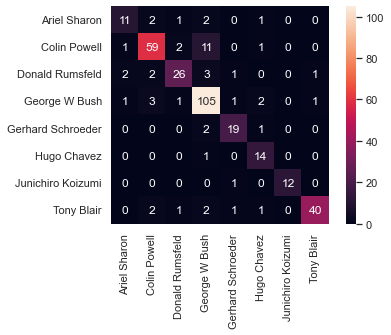

In [61]:
## creamos un mapa de calor
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=True, xticklabels=faces.target_names,
            yticklabels=faces.target_names)

## Conclusión
ya existán redes neuronales pre entrenadas capaces de detectar rostros, nosotros usamos una maquina de soporte vectorial y utilizamos pixeles aleatorios para crear la clasificación, en un algoritmo más robusto se utilizan rasgos reales para clasificar las caras